## **Purpose**
 In this notebook we will begin Research Question 2: 'What are the rating/sale trends for video games.'
* In This notebook we will be looking specifically at:
    * The rating/sale trend over time.
    * The rating/sale trend of video games by genre.
    * The rating/sale trend of video games by ESRB rating.
    

## **Dataset**
500.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# standard library imports
import itertools
import re
from sklearn import linear_model

In [2]:
sns.set_context("talk", font_scale=1.4)

In [3]:
if not os.path.exists("../data/prep/500.csv"):
    print("Missing dataset file")
else:
    print("Success!")

Success!


In [4]:
df=pd.read_csv('../data/prep/500.csv')

In [5]:
year_data = df['release_year']
print("Newest games were made in: ", year_data.max())

Newest games were made in:  2020


In [6]:
print("Number of games: ", len(df))
developers = df['developer'].unique()
print("Number of developers: ", len(developers))
platforms = df['platform'].unique()
print("Number of platforms: ", len(platforms))
genres = df['game_genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  7374
Number of developers:  1501
Number of platforms:  18
Number of genres:  19


## **Ratings and Sales over time**

For this analysis I will filter out the games that were released in 2019 and 2020. This is because it take VGChartz quite a long time to update sales for more recent games. Because of this there isnt a lot of games from 2019 0r 2020 in our dataset. In addition to that, it is early in 2020 so its not fair to look at 2020 as a whole year when its onky quite early in the year. The reason I havent completely removed these games from our dataset is beacuse this wont effect our genre or esrb analysis later on.

In [57]:
years=[2019,2020]
yeardf=df[~df['release_year'].isin(years)]
yeardf.shape

(7345, 26)

In [58]:
yeardf.to_csv('../data/analysis/year.csv')

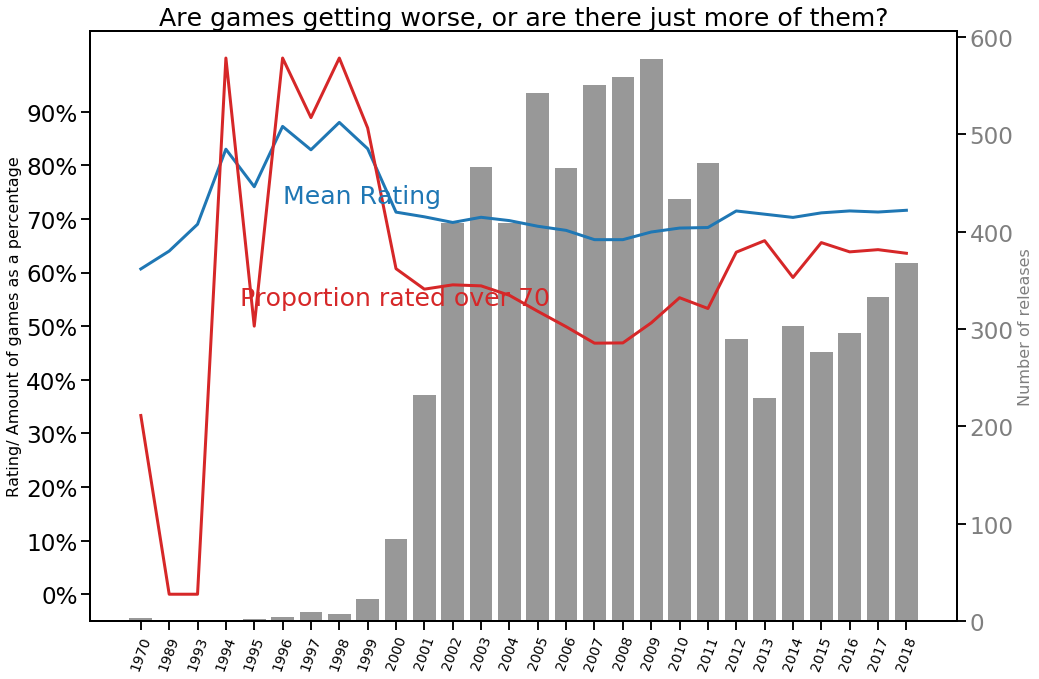

In [8]:
rating_threshold = 70
years = []
proportions = []
totals = []
avg_ratings = []
max_ratings = []

# calculate values for plotting
for year in sorted(yeardf['release_year'].unique()):
    
    year_data = yeardf[yeardf['release_year'] == year]
    total = year_data.shape[0]
    n_high_rating = year_data[year_data['meta_critic_score'] >= rating_threshold].shape[0]
    avg_rating = year_data['meta_critic_score'].mean() / 100
    
    years.append(year)
    totals.append(total)
    proportions.append(n_high_rating/total)
    avg_ratings.append(avg_rating)
    
    # print(f'{year} | {n_high_rating/total:.2f}')
    
fig, ax1 = plt.subplots(figsize=(15,10))


# ensure lines drawn over bars
ax1.set_zorder(1)
ax1.patch.set_visible(False)

# plot trendlines
ax1.plot(avg_ratings, color='tab:blue', label='Average Rating', linewidth=3)
ax1.plot(proportions, color='tab:red', label=f'Proportion of games rated over {rating_threshold}', linewidth=3)

x_pos = np.arange(len(years))
ax1.set_xticks(x_pos)
ax1.set_xticklabels(years, fontsize=14,rotation=70)
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%','90%'])
ax1.set_ylabel('Rating/ Amount of games as a percentage', color='black', fontsize=16)
# instead of legend, place text directly over lines
ax1.text(5, 0.73, 'Mean Rating', color='tab:blue')
ax1.text(3.5, 0.54, 'Proportion rated over 70', color='tab:red')
# ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.1))

# allow multiple axis on same plot
ax2 = ax1.twinx()

# plot number of releases by year
color = 'tab:gray'
ax2.bar(x_pos, totals, color=color, alpha=.8)

ax2.set_ylabel('Number of releases', color=color, fontsize=16)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Are games getting worse, or are there just more of them?')

fig.tight_layout()
plt.show()

The above plot shows the number of releases in each year as grey bars with the axis on the right. The blue line shows the average (mean) rating for games released in each year, with the rating as a percentage on the left axis. The red line shows what proportion of games released in each year are rated with a score over 75, and shows this proportion as a percentage on the left axis. As an example, in 2002 over 400 games were released, and the mean rating of these games is about 70%. Of these games, 40% of them have a rating score of 75 or higher. That's a good year for games!

This shows that the number of console games increased significantly after the 90's but has seen a decrease in recent years. I think this is due to the increase in mobile gaming. A lot of developers are now, not only developing console games but also mobile games. In 2008 apple launched its app store and google launched the play store and as you can see from this graph, the number of console games decreased shorly after.
The average rating of games fluctuated quite a lot early on but thats probably due to the lower number of games. It seems the have stayed pretty consistant since 2000, fluctuating sligtly above or below the 70.

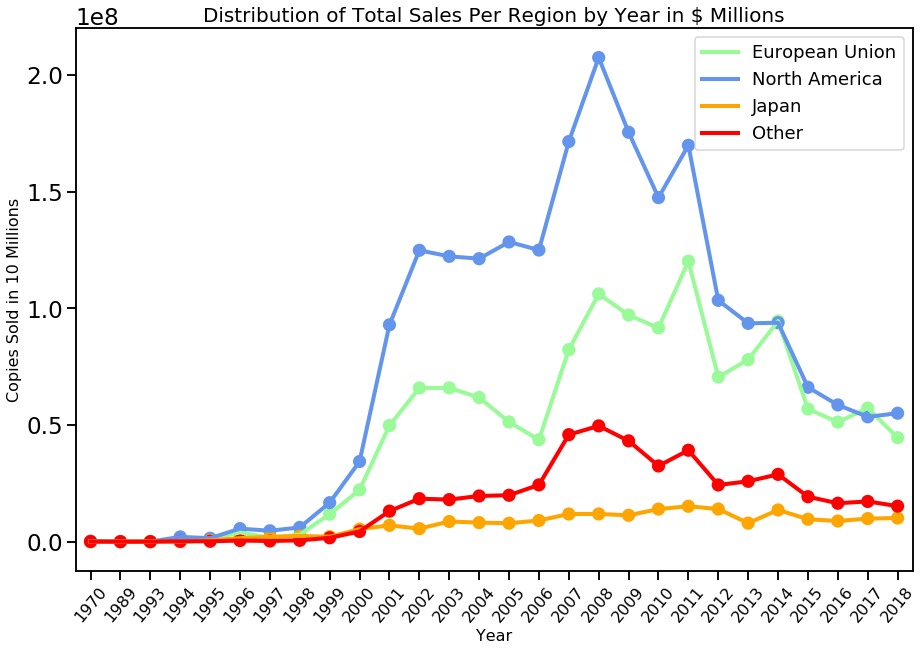

In [9]:
EU = yeardf.pivot_table('eu_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
NA = yeardf.pivot_table('na_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
JP = yeardf.pivot_table('jp_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
Other = yeardf.pivot_table('other_sales', columns='name', index='release_year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','North America','Japan','Other']

plt.figure(figsize=(15,10))
ax = sns.pointplot(x=years, y=EU, color='palegreen', scale=1)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=1)
ax = sns.pointplot(x=years, y=JP, color='orange', scale=1)
ax = sns.pointplot(x=years, y=Other, color='red', scale=1)
ax.set_xticklabels(labels=years, fontsize=16, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Copies Sold in 10 Millions', fontsize=16)
ax.set_title(label='Distribution of Total Sales Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

This simple graph actually tells us a lot. You can see that the console gaming industry looks to be decreasing. Obviously this doesnt take into account console online subscriptions, console sales, in game purchases etc, so it isnt fair to say that the console industry in declining but it certainly looks to be declining in terms of game copies sold and may indicate that the future of console gaming isnt too bright.
We can also see that North America is the largest market and peaked in 2008. Its interesting to see how Europe and North America have began to share a similar portion of the overall market in recent years.

# **Genre Analysis**

We may need to filter out some genres from our analysis as they dont have enough games representing them and therefore dont give accurate results.

In [10]:
df.groupby('game_genre').count()['name']

game_genre
Action              1538
Action-Adventure     187
Adventure            516
Board+Game             1
Education              1
Fighting             433
MMO                   18
Misc                 475
Music                 80
Party                  9
Platform             519
Puzzle               156
Racing               640
Role-Playing         614
Shooter              749
Simulation           263
Sports               919
Strategy             240
Visual+Novel          16
Name: name, dtype: int64

Some Genres only have 1 game in the dataset. This is very low. We will filter out games with genre as Board+Game, Education, MMO, Music, Party or Visual+Novel. Although we will not be using these genres in our genre analysis I still think that these number show us something. It shows us that these genres certainly arent popular.

In [11]:
l=['Board+Game','Education','MMO','Music','Party','Visual+Novel']
genre_df = df[~ df['game_genre'].isin(l) ]
print(genre_df.shape)

(7249, 26)


Now I will create the dataframe that I will use for my analysis. I will group our dataset by genre.

In [12]:
data = genre_df.groupby(['game_genre']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
data=data.reset_index()
data.columns = ['Genre','Global Sales']

data1 = genre_df.groupby(['game_genre']).count().iloc[:,0]
data1=data1.reset_index()
data1.columns = ['Genre','Releases']

data2 = genre_df.groupby(['game_genre']).sum()['meta_critic_score']
data2 = pd.DataFrame(data2.sort_values(ascending=False))
data2=data2.reset_index()
data2.columns = ['Genre','Critic Rating']

data3 = genre_df.groupby(['game_genre']).sum()['meta_user_score']
data3 = pd.DataFrame(data3.sort_values(ascending=False))
data3=data3.reset_index()
data3.columns = ['Genre','User Rating']

final_data = pd.merge(left=data, right=data1, how='left', left_on='Genre', right_on='Genre')
final_data = pd.merge(left=final_data, right=data2, how='left', left_on='Genre', right_on='Genre')
final_data = pd.merge(left=final_data, right=data3, how='left', left_on='Genre', right_on='Genre')

final_data['Sales Per Release']= final_data['Global Sales'] / final_data['Releases']
final_data['Average Critic Rating']= round(final_data['Critic Rating'] / final_data['Releases'],1)
final_data['Average User Rating']= round(final_data['User Rating'] / final_data['Releases'],1)
final_data=final_data.set_index('Genre')
final_data.head()

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
Genre,,,,,,,
Action,927350000.0,1538,101282,10720.5,602958.387516,65.9,7.0
Sports,644390000.0,919,67032,6198.8,701186.071817,72.9,6.7
Shooter,640530000.0,749,52674,5212.7,855180.240320,70.3,7.0
Racing,352950000.0,640,43838,4421.5,551484.375000,68.5,6.9
Misc,304650000.0,475,32006,3206.5,641368.421053,67.4,6.8


In [13]:
final_data.to_csv('../data/analysis/genre.csv')

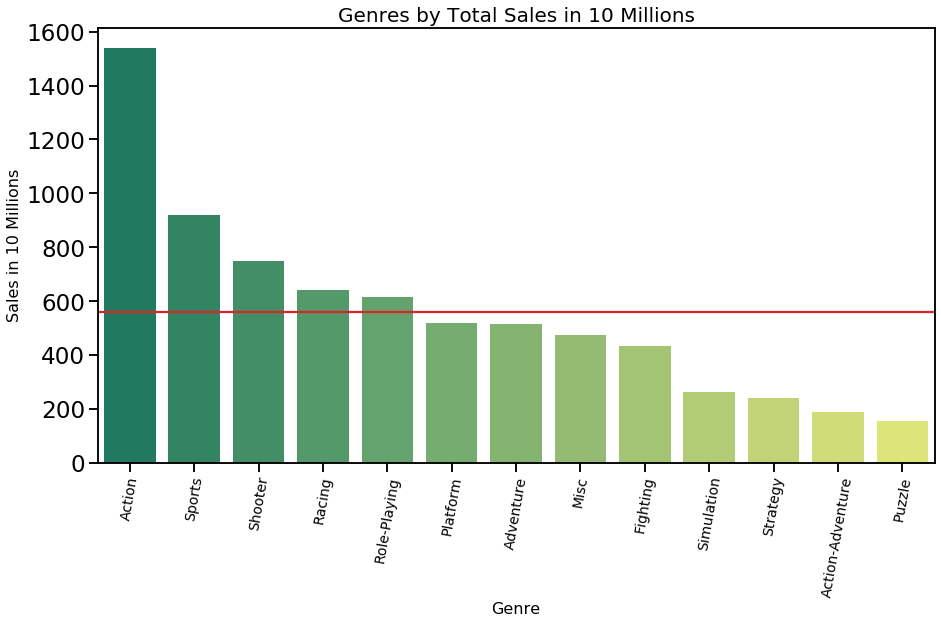

In [14]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(final_data.sort_values(by='Releases',ascending=False))

colors = sns.color_palette("summer", len(data))
ax = sns.barplot(y = 'Releases' , x = data.index, data=data, palette=colors)
ax.set_ylabel(ylabel='Sales in 10 Millions', fontsize=16)
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Sales in 10 Millions', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=80)
mean=data['Releases'].mean()
ax.axhline(mean,color='tab:red')

plt.show();

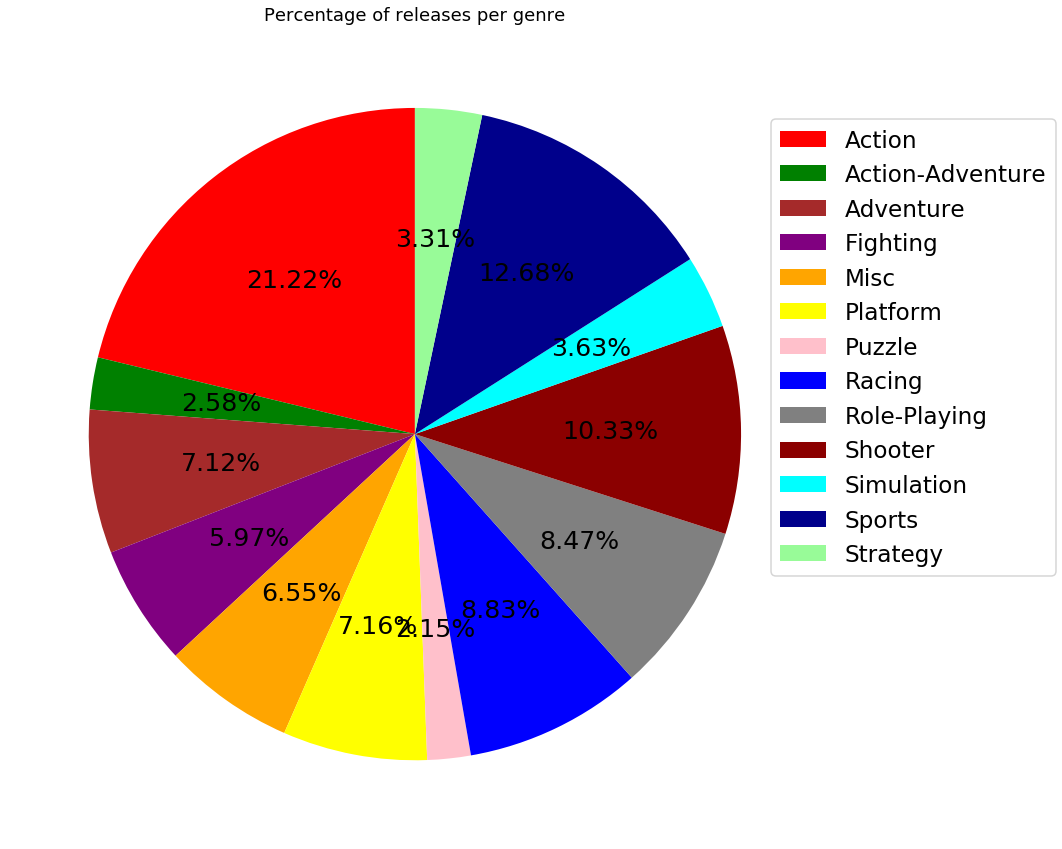

In [15]:
#Sector graph of the differents ESRB Rating.
ratings = genre_df.groupby(["game_genre"])["name"].agg("count")
labels = ratings.index
explode= [0.02, 0.02, 0.02, 0.02, 0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]
colors=['red','green','brown','purple','orange','yellow','pink','blue','grey','darkred','cyan','darkblue','palegreen']
fig,ax = plt.subplots(figsize=(15,15))
ax.pie(ratings, autopct="%.2f%%", startangle=90,colors=colors)

ax.set_title("Percentage of releases per genre", fontsize=18)
plt.legend(labels, loc='best', bbox_to_anchor=(0.6, 0.4, 0.7, 0.5))

These graphs shows us that most games are Action games ,Sports has the second most number of games while shooter come third. Nearly 50% of the games fall within these 3 genres. The last few genres fall well below the average.

# <font color='red'> **Genre V Sales** </font> 

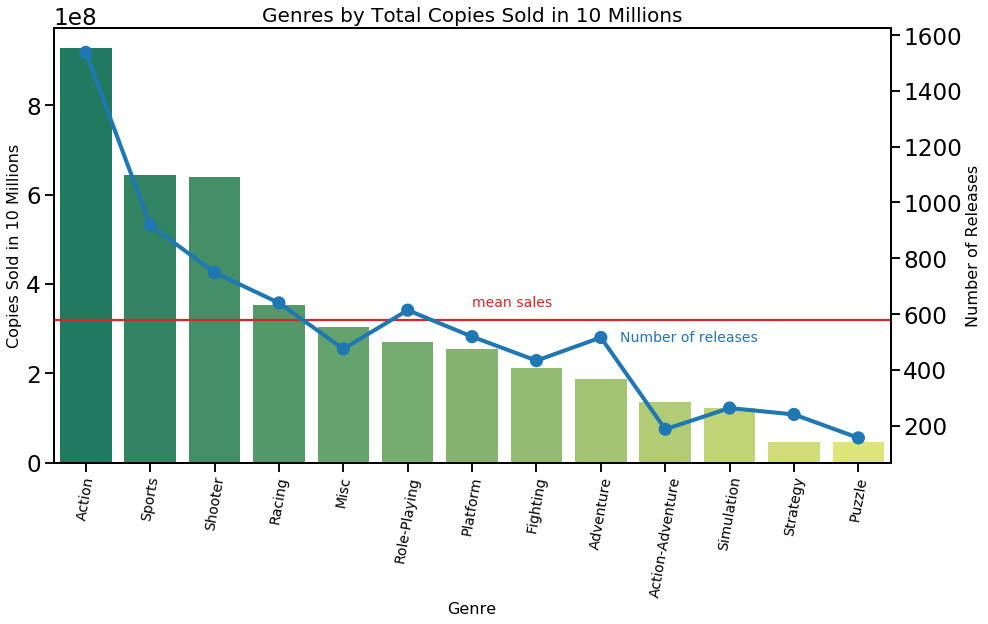

In [16]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(final_data.sort_values(by='Global Sales',ascending=False))

colors = sns.color_palette("summer", len(data))
ax = sns.barplot(y = 'Global Sales' , x = data.index, data=data, palette=colors)
ax.set_ylabel(ylabel='Copies Sold in 10 Millions', fontsize=16)
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Copies Sold in 10 Millions', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=80)
mean=final_data['Global Sales'].mean()
ax.axhline(mean,color='tab:red')
ax.text(6, 350000000, 'mean sales', color='tab:red',fontsize=14)

#allow multiple axis on same plot
ax2 = ax.twinx()
ax2 = sns.pointplot(y = 'Releases' , x =data.index, data=final_data)
ax2.set_ylabel(ylabel='Number of Releases', fontsize=16)
ax2.text(8.3, 500, 'Number of releases', color='tab:blue',fontsize=14)

plt.show();

As expected, Action is the genre with the most overall sales as it has the most number of games. Now i want to look make the comparisson across genres more fair by taking into consideration the number of releases for each genre.

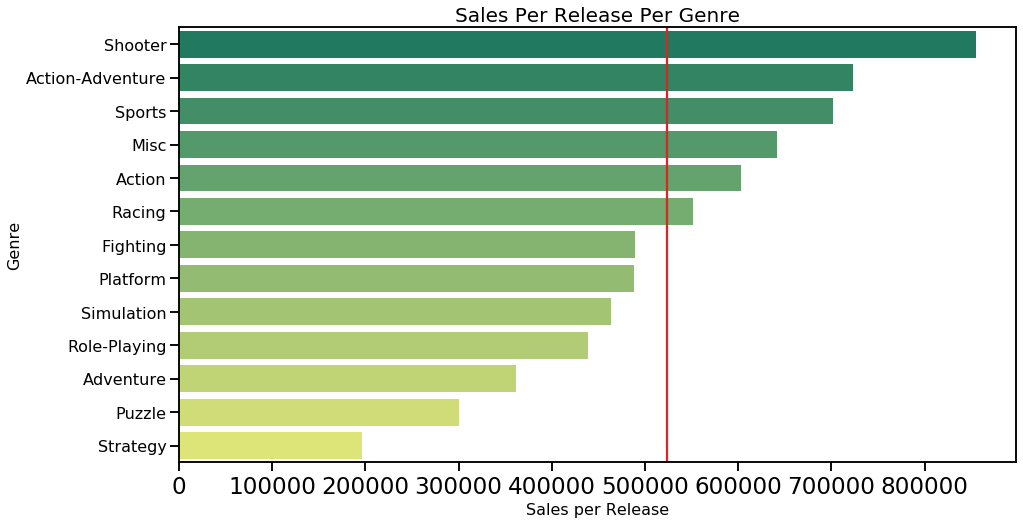

In [17]:
data =  final_data.sort_values(by='Sales Per Release',ascending=False)
genres = data.index

colors = sns.color_palette("summer", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = genres , x = 'Sales Per Release', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Sales per Release', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Sales Per Release Per Genre', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=16)

mean=data['Sales Per Release'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

Now, Action isnt even in the top 3 and is just above the average. Shooter has the highest number of sales per release. I feel as though this graph tell a good story of genres are easier to make good games for on console

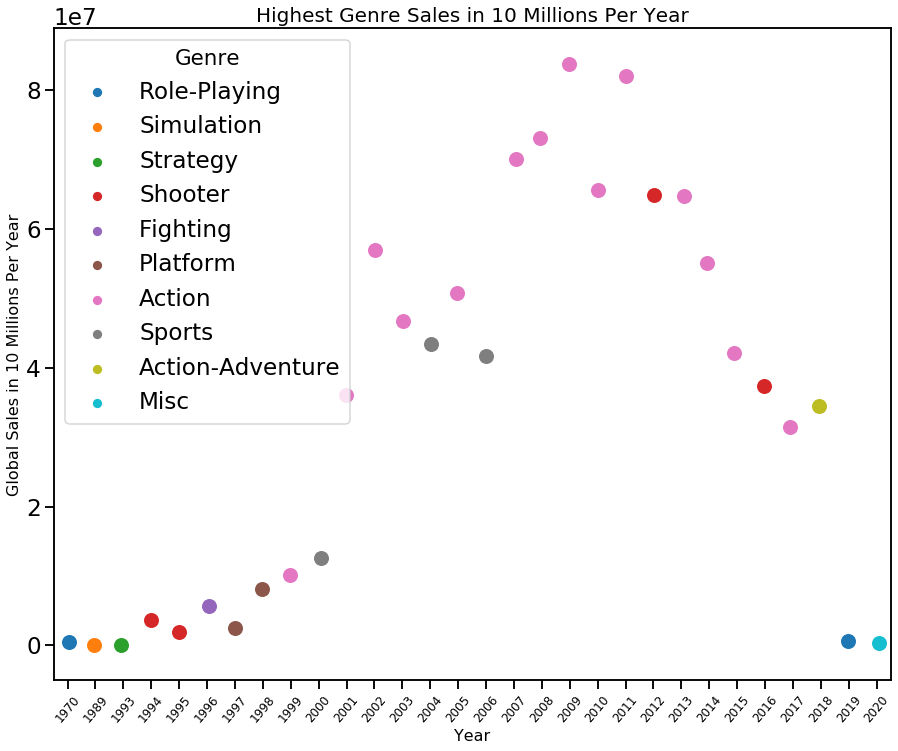

,Genre,Global Sales
release_year,,
1970,Role-Playing,420000.0
1989,Simulation,30000.0
1993,Strategy,60000.0
1994,Shooter,3610000.0
1995,Shooter,1950000.0


In [18]:
table = df.pivot_table('global_sales', index='game_genre', columns='release_year', aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([genres, sales], axis=1)
data.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(15,12))
ax = sns.stripplot(y = 'Global Sales', x = years, data=data, size=15,hue='Genre')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales in 10 Millions Per Year', fontsize=16)
ax.set_title(label='Highest Genre Sales in 10 Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();
data.head()

This graph shows the best selling genre for each year. Action dominates this with being the best selling genre for 14 of the 30 years.

In [19]:
# Pulling only the data from 1991 to 2016
data = df.loc[df.release_year >= 2000]

# Finding the median sales value by genre and year
Med_Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['release_year'],
                     columns=['game_genre'],values=['global_sales'],aggfunc=np.median)
Med_Sales_by_Gen_and_Yr.columns = Med_Sales_by_Gen_and_Yr.columns.get_level_values(1)

Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.dropna(thresh=15,axis='columns')
Med_Sales_by_Gen_and_Yr.head()

game_genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
release_year,,,,,,,,,,,,
2000,300000.0,130000.0,230000.0,3190000.0,230000.0,295000.0,700000.0,350000.0,645000.0,290000.0,1025000.0,140000.0
2001,315000.0,195000.0,370000.0,190000.0,345000.0,1585000.0,320000.0,240000.0,170000.0,410000.0,400000.0,50000.0
2002,250000.0,190000.0,180000.0,280000.0,300000.0,95000.0,265000.0,180000.0,270000.0,300000.0,210000.0,90000.0
2003,185000.0,170000.0,260000.0,160000.0,285000.0,50000.0,200000.0,190000.0,150000.0,410000.0,300000.0,80000.0
2004,190000.0,190000.0,265000.0,175000.0,420000.0,215000.0,435000.0,215000.0,220000.0,360000.0,450000.0,70000.0


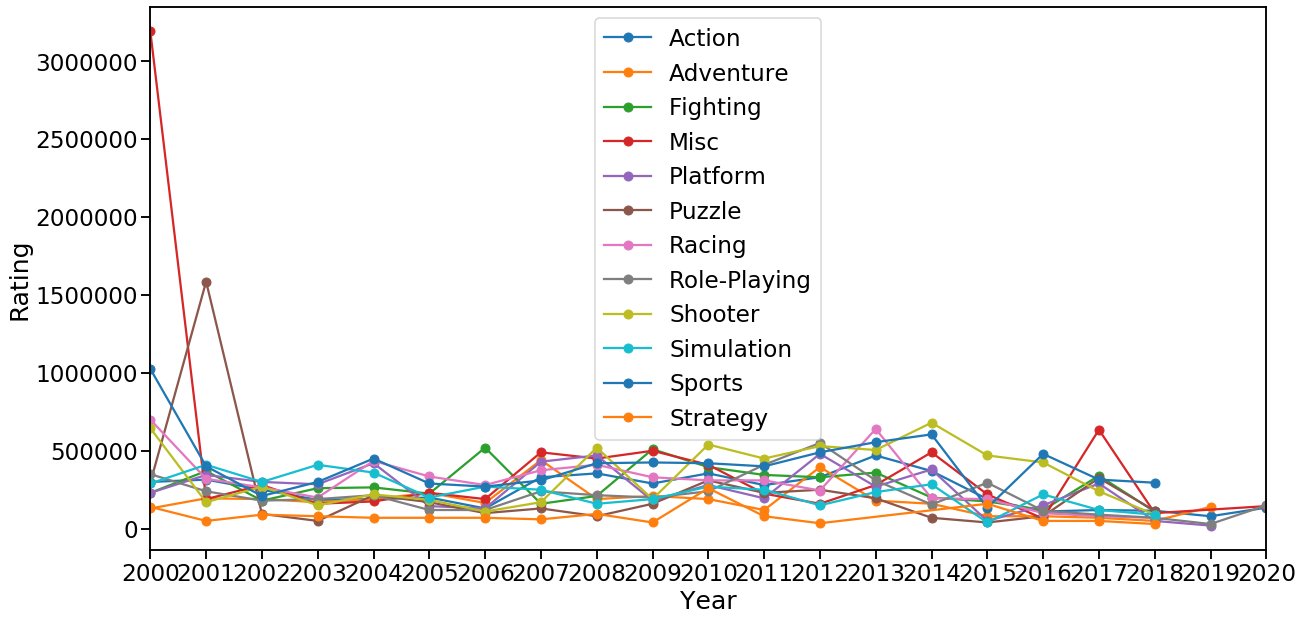

In [20]:
for column in Med_Sales_by_Gen_and_Yr:
    data= Med_Sales_by_Gen_and_Yr[column].dropna()
    years=Med_Sales_by_Gen_and_Yr.index
    # Plot the lineplo
    data.plot(figsize=(20,10),label=column,marker='o');
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Rating')
    plt.xticks(years)

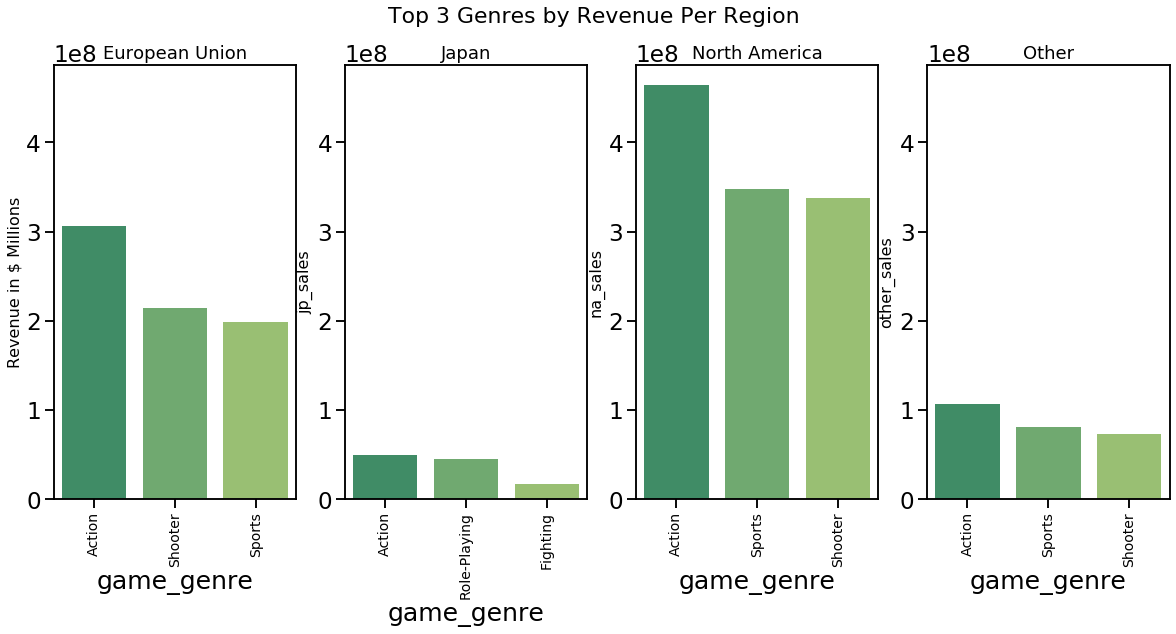

In [21]:
EU = df.pivot_table('eu_sales', columns='game_genre', aggfunc='sum').T
EU = EU.sort_values(by='eu_sales', ascending=False).iloc[:3]
EU_genres = EU.index

JP = df.pivot_table('jp_sales', columns='game_genre', aggfunc='sum').T
JP = JP.sort_values(by='jp_sales', ascending=False).iloc[:3]
JP_genres = JP.index

NA = df.pivot_table("na_sales", columns='game_genre', aggfunc='sum').T
NA = NA.sort_values(by="na_sales", ascending=False).iloc[:3]
NA_genres = NA.index

Other = df.pivot_table('other_sales', columns='game_genre', aggfunc='sum').T
Other = Other.sort_values(by='other_sales', ascending=False).iloc[:3]
Other_genres = Other.index

#colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue","Fighting":'Orange'}
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
colors = sns.color_palette("summer", 4)
sns.barplot(x=EU_genres, y=EU["eu_sales"],palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)
plt.ylabel('Revenue in $ Millions', size=16)

sns.barplot(x=JP_genres, y=JP['jp_sales'],palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)
plt.ylabel('Revenue in $ Millions', size=16)

sns.barplot(x=NA_genres, y=NA['na_sales'],palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
plt.ylabel('Revenue in $ Millions', size=16)

sns.barplot(x=Other_genres, y=Other['other_sales'],palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();

This graph shows us that action is the best selling genre in all of the regions. Its interesting to see that Action Sports and shooter are the top 3 selling genres for all regions except Japan. Role-playing and fightening are the second and third best selling genres in Japan.

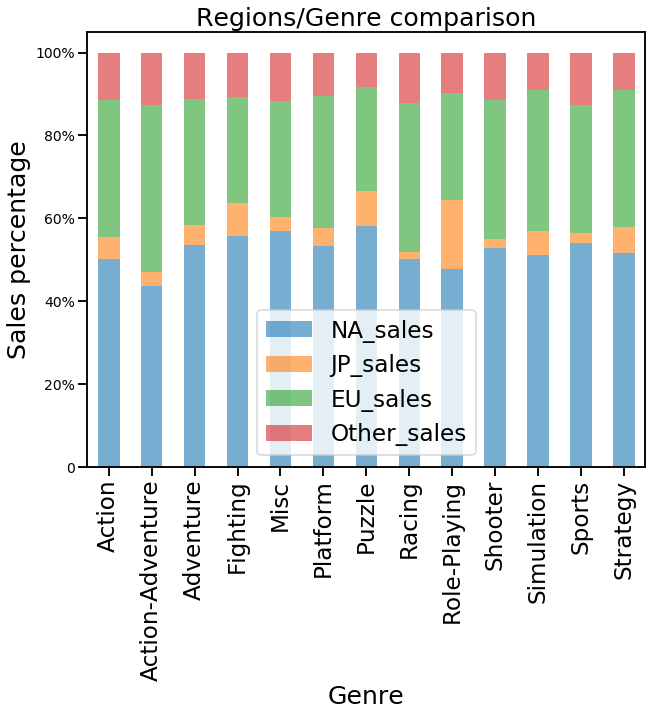

In [55]:
data=genre_df[['name','na_sales','eu_sales','jp_sales','other_sales','game_genre']]
data=data.groupby(data['game_genre']).sum()
data['NA_sales']= data['na_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['JP_sales']=data['jp_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['EU_sales']=data['eu_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['Other_sales']=data['other_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data=data.drop(['na_sales','jp_sales','eu_sales','other_sales'],axis=1)
data=data.plot.bar(stacked=True, alpha=0.6,title='Regions/Genre comparison',figsize=(10,8))
data.set_yticklabels(labels=['0','20%','40%','60%','80%','100%'],size=14)
var=data.set(xlabel='Genre',ylabel= 'Sales percentage'  )

This graphs shows the protions of each genres sales for each region. The trend is the same for all genres, North america has the largest portion of the sales, Europe in second and Japan and the rest of the world sharing fairly equal portions.

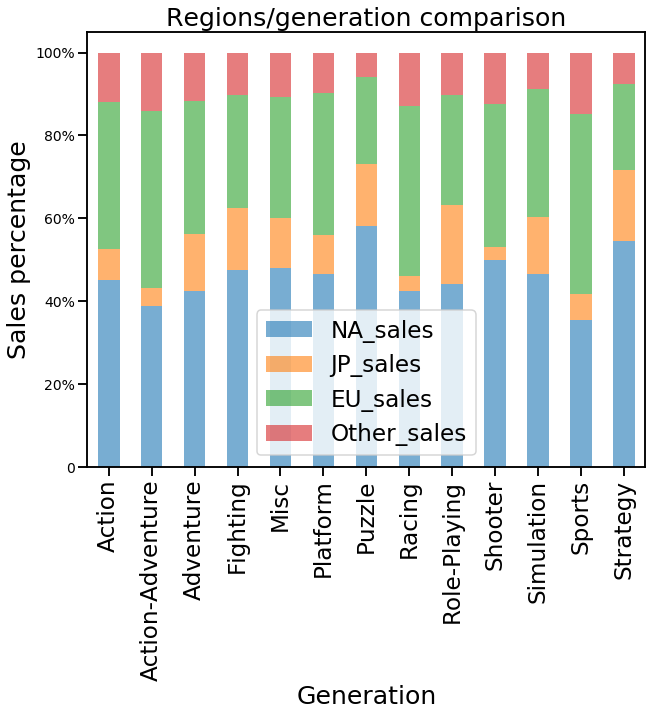

In [23]:
df2=genre_df[['name','na_sales','eu_sales','jp_sales','other_sales','game_genre']]
df2=df2.replace(0,np.nan)
df2=df2.dropna()
df2=df2.groupby(df2['game_genre']).sum()
df2['NA_sales']= df2['na_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['JP_sales']=df2['jp_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['EU_sales']=df2['eu_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['Other_sales']=df2['other_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2=df2.drop(['na_sales','jp_sales','eu_sales','other_sales'],axis=1)
f=df2.plot.bar(stacked=True, alpha=0.6,title='Regions/generation comparison',figsize=(10,8))
f.set_yticklabels(labels=['0','20%','40%','60%','80%','100%'],size=14)
var=f.set(xlabel='Generation',ylabel= 'Sales percentage'  )

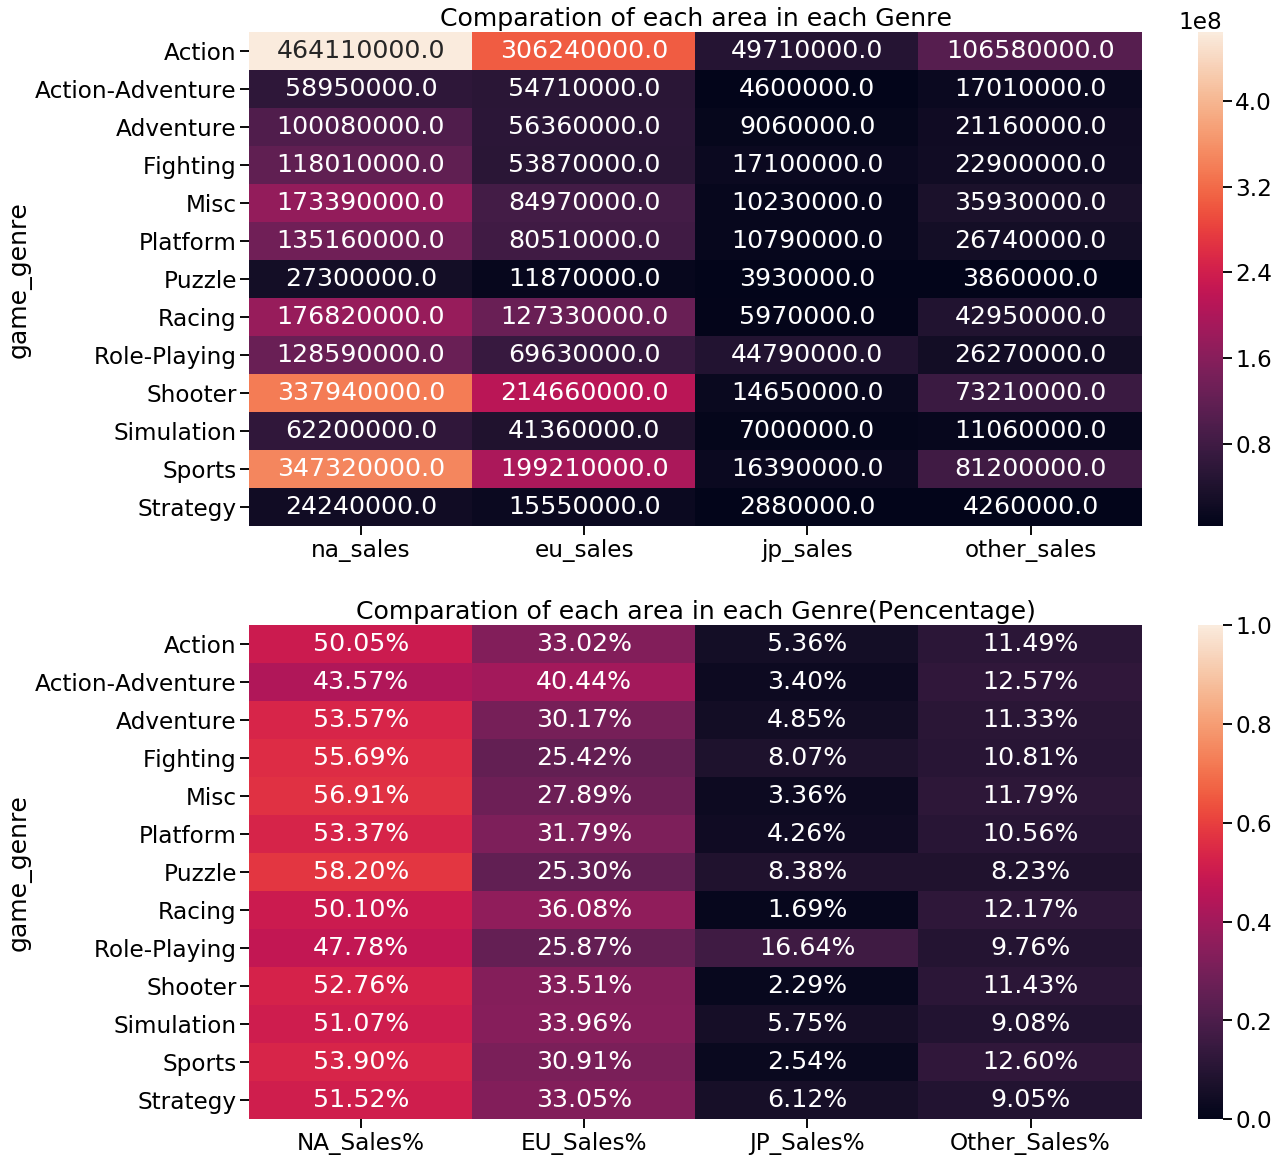

In [24]:
GenreGroup = genre_df.groupby(['game_genre']).sum().loc[:, 'na_sales':'global_sales']
GenreGroup['NA_Sales%'] = GenreGroup['na_sales']/GenreGroup['global_sales']
GenreGroup['EU_Sales%'] = GenreGroup['eu_sales']/GenreGroup['global_sales']
GenreGroup['JP_Sales%'] = GenreGroup['jp_sales']/GenreGroup['global_sales']
GenreGroup['Other_Sales%'] = GenreGroup['other_sales']/GenreGroup['global_sales']
plt.figure(figsize=(20, 20))
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'na_sales':'other_sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

# <font color='red'> **Genre V Ratings** </font> 

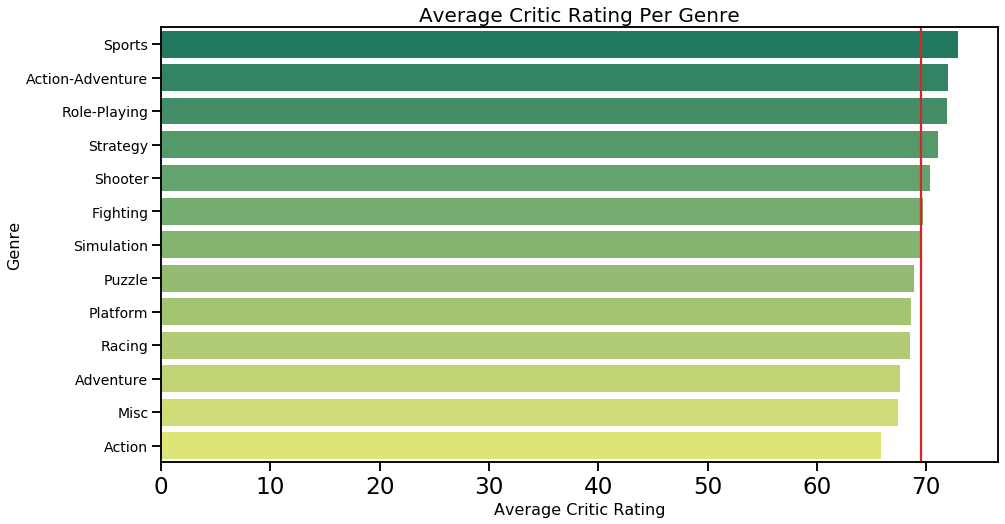

In [25]:
data = final_data.sort_values(by='Average Critic Rating',ascending=False)
genres = data.index

colors = sns.color_palette("summer", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = genres , x = 'Average Critic Rating', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Critic Rating', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Average Critic Rating Per Genre', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)

mean=data['Average Critic Rating'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

This graph shows the Average rating for games in each genre. Sports, Action-Adventure, Role-playing, Strategy, Shooter and Fighting are all above average with Sports games having the overall best average rating. Its very surprising to see Action games have the worst average rating considering that they were high up in the sales per release chart.

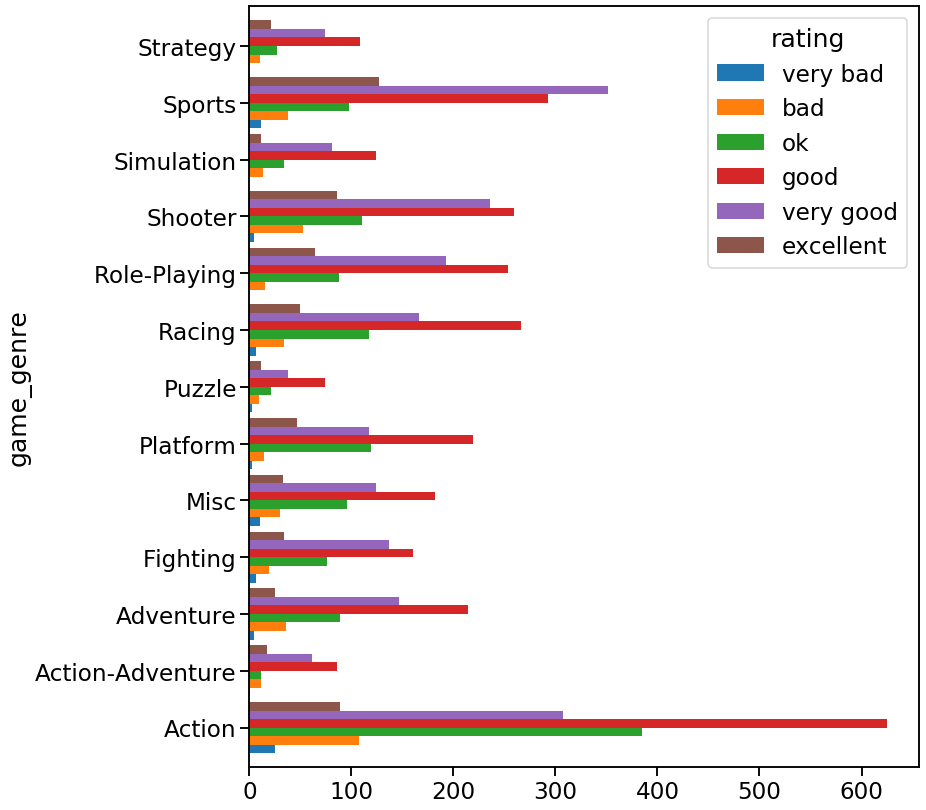

In [48]:
clone=genre_df.copy()
replace_dict = {
        'very bad': 30, 
        'bad': 45, 
        'ok': 60, 
        'good': 75, 
        'very good': 85, 
        'excellent': 100, 
}
clone['rating'] = pd.cut(clone['meta_critic_score'],
                      bins=[1]+list(replace_dict.values()),
                      labels=list(replace_dict.keys()))

colors= sns.diverging_palette(220, 20, n=7)
clone=clone[['rating','platform','game_genre','meta_critic_score']]
plat=clone.groupby(['game_genre','rating'])['meta_critic_score'].count().reset_index()
plat=plat.pivot('game_genre','rating','meta_critic_score')
plat.plot.barh(width=0.9)
fig=plt.gcf()
fig.set_size_inches(12,14)
plt.show()

This graph shows the number of very bad (>= 30),bad (31-45), ok (46-60), good (61-75), very good (75-85), and excellent (86-100) games each genre has. As you can see, most games are in the good category. Each genre has either 0 or a very small amount of very bad games, which is good to see! You can see why the average rting for sports games was the best. The largest portion of Sports games are in the very good rated category. Sports has the highest number of very good and excellent rated games despite some genres, like Action, having a far larger number of overall games.

Text(0, 0.5, 'meta_critic_score')

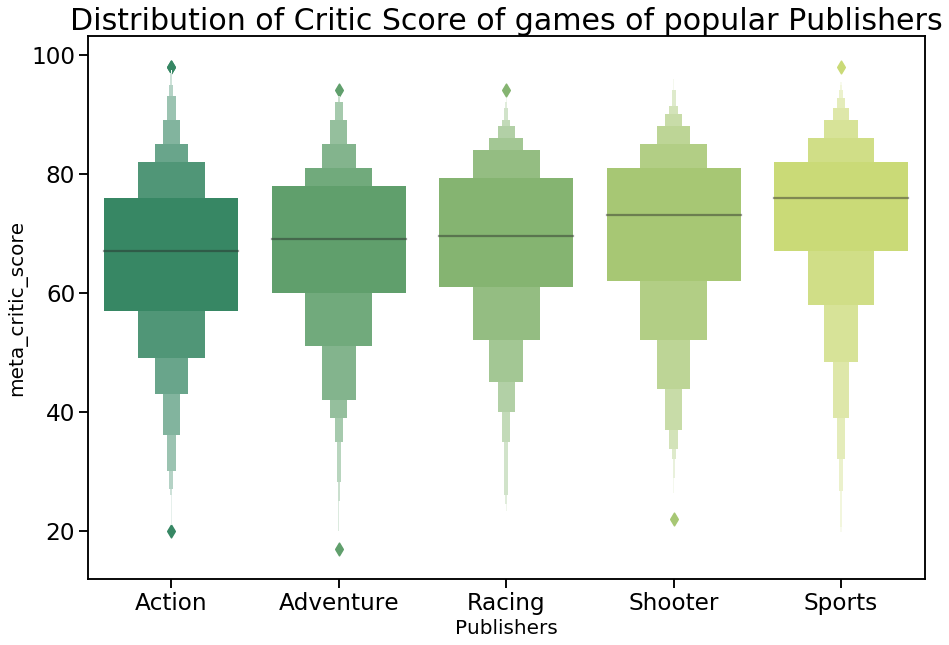

In [28]:
data=genre_df[genre_df['game_genre'].isin(['Action','Sports','Racing','Shooter','Adventure'])]
plt.figure(figsize=(15,10))
colors = sns.color_palette("summer", 5)
sns.boxenplot(x='game_genre',y='meta_critic_score',data=data,palette=colors)
plt.title('Distribution of Critic Score of games of popular Publishers',fontdict={'fontsize':30})
plt.xlabel('Publishers',fontdict={'fontsize':20})
plt.ylabel('meta_critic_score',fontdict={'fontsize':20})

Text(0, 0.5, 'meta_user_score')

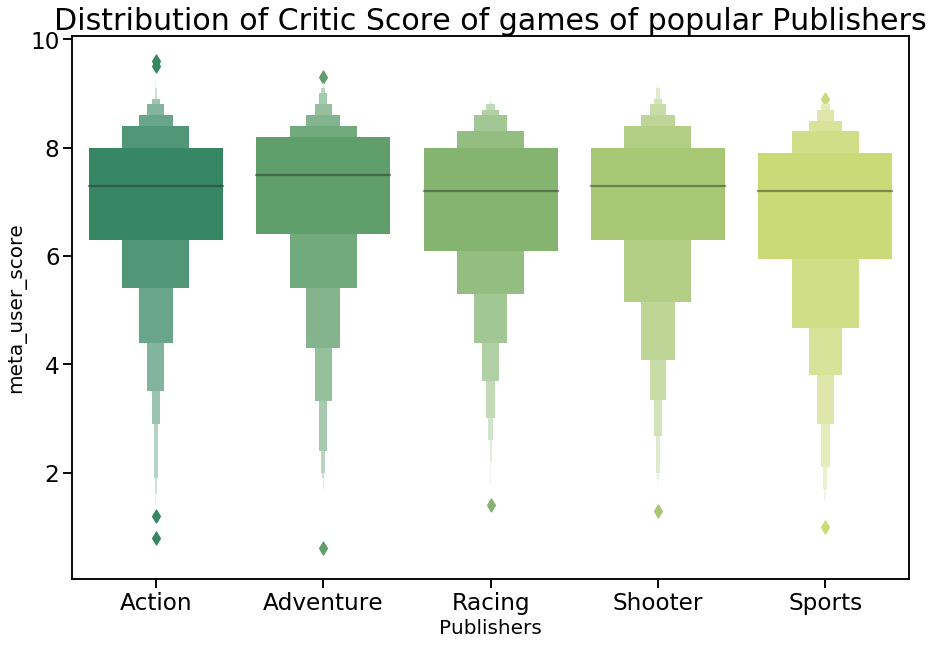

In [29]:
data=genre_df[genre_df['game_genre'].isin(['Action','Sports','Racing','Shooter','Adventure'])]
plt.figure(figsize=(15,10))
colors = sns.color_palette("summer", 5)
sns.boxenplot(x='game_genre',y='meta_user_score',data=data,palette=colors)
plt.title('Distribution of Critic Score of games of popular Publishers',fontdict={'fontsize':30})
plt.xlabel('Publishers',fontdict={'fontsize':20})
plt.ylabel('meta_user_score',fontdict={'fontsize':20})

# **ESRB Rating Analysis**

In [30]:
df.groupby('meta_esrb').count()['name']

meta_esrb
E       2171
E10+    1159
M       1541
T       2503
Name: name, dtype: int64

There is no need to filter out any of the ESRB ratings as we did with genres as each rating is represented by a large enough portion of the dataframe.

In [31]:
data = genre_df.groupby(['meta_esrb']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
data=data.reset_index()
data.columns = ['ESRB','Global Sales']

data1 = genre_df.groupby(['meta_esrb']).count().iloc[:,0]
data1=data1.reset_index()
data1.columns = ['ESRB','Releases']

data2 = genre_df.groupby(['meta_esrb']).sum()['meta_critic_score']
data2 = pd.DataFrame(data2.sort_values(ascending=False))
data2=data2.reset_index()
data2.columns = ['ESRB','Critic Rating']

data3 = genre_df.groupby(['meta_esrb']).sum()['meta_user_score']
data3 = pd.DataFrame(data3.sort_values(ascending=False))
data3=data3.reset_index()
data3.columns = ['ESRB','User Rating']

final_data = pd.merge(left=data, right=data1, how='left', left_on='ESRB', right_on='ESRB')
final_data = pd.merge(left=final_data, right=data2, how='left', left_on='ESRB', right_on='ESRB')
final_data = pd.merge(left=final_data, right=data3, how='left', left_on='ESRB', right_on='ESRB')

final_data['Sales Per Release']= final_data['Global Sales'] / final_data['Releases']
final_data['Average Critic Rating']= round(final_data['Critic Rating'] / final_data['Releases'],1)
final_data['Average User Rating']= round(final_data['User Rating'] / final_data['Releases'],1)
final_data=final_data.set_index('ESRB')
final_data.head()

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
ESRB,,,,,,,
M,1.263510e+09,1521,107985,10810.0,830710.059172,71.0,7.1
E,1.197500e+09,2156,148910,14913.2,555426.716141,69.1,6.9
T,1.152270e+09,2458,168886,17506.3,468783.563873,68.7,7.1
E10+,5.287800e+08,1114,75426,7503.1,474667.863555,67.7,6.7


In [32]:
final_data.to_csv('../data/analysis/ESRB.csv')

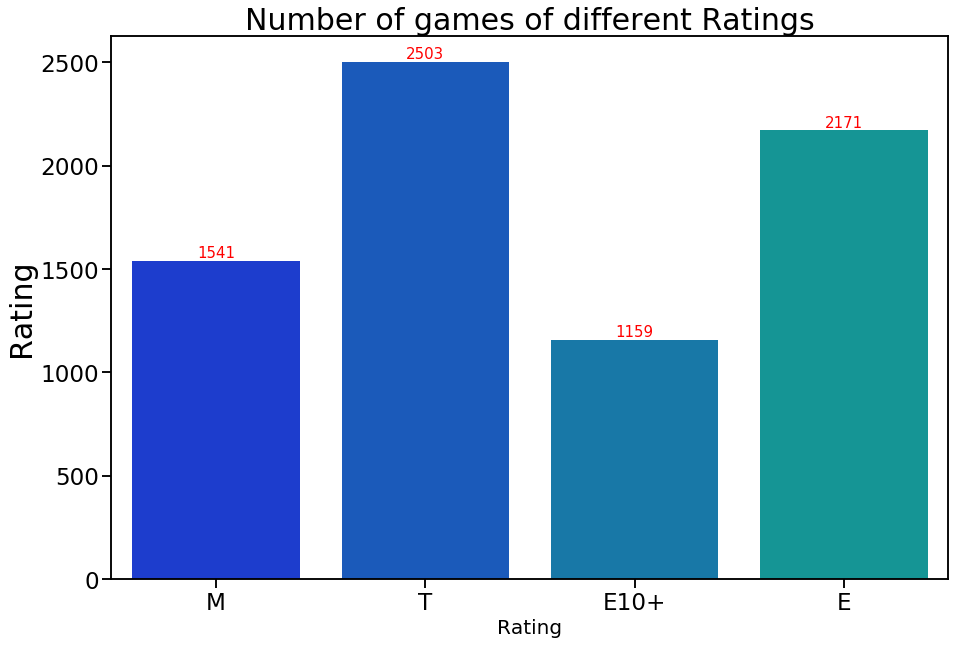

In [33]:
plt.figure(figsize=(15,10))
colors = sns.color_palette("winter", 5)
ax=sns.countplot(df['meta_esrb'],palette=colors)
plt.title('Number of games of different Ratings',fontdict={'fontsize':30})
plt.xlabel('Rating',fontdict={'fontsize':20})
plt.ylabel('Rating',fontdict={'fontsize':30})
for bar in ax.patches:
    ax.text(bar.get_x()+bar.get_width()/2,bar.get_height(),int(bar.get_height()),ha='center',va='bottom',fontsize=15,color='red')

This bar chart shows the number of games that have a certain ESRB Rating.

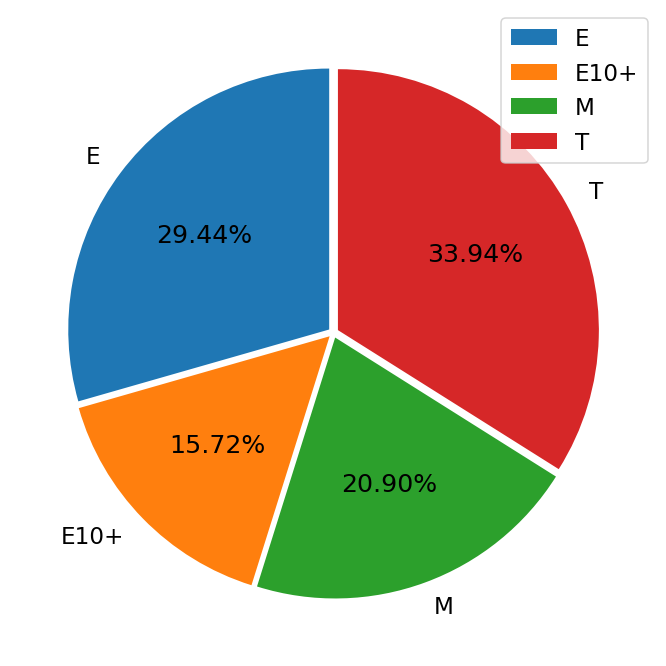

In [34]:
#Sector graph of the differents ESRB Rating.
ratings = df.groupby(["meta_esrb"])["name"].agg("count")
labels = ["E", "E10+", "M", "T"]
explode= [0.02, 0.02, 0.02, 0.02]

fig,ax = plt.subplots(figsize=(12,12))
ax.pie(ratings, labels=labels, explode=explode, autopct="%.2f%%", startangle=90)

plt.legend(["E", "E10+", "M", "T"])

As we can see, the largest protion of games have a T (Teen) rating. This was quite surprising as I felt the E (Everbody) rating.

# <font color='red'>**ESRB v Sales** </font> 

M (Mature) rated games get the most sales per releases. This isnt at all surprising as as people in this age category are more likely to be able to afford video games and don’t need permission from anyone to do so. E10+ (Everbody from 10 onwards) rated games fall shockingly low below the average.

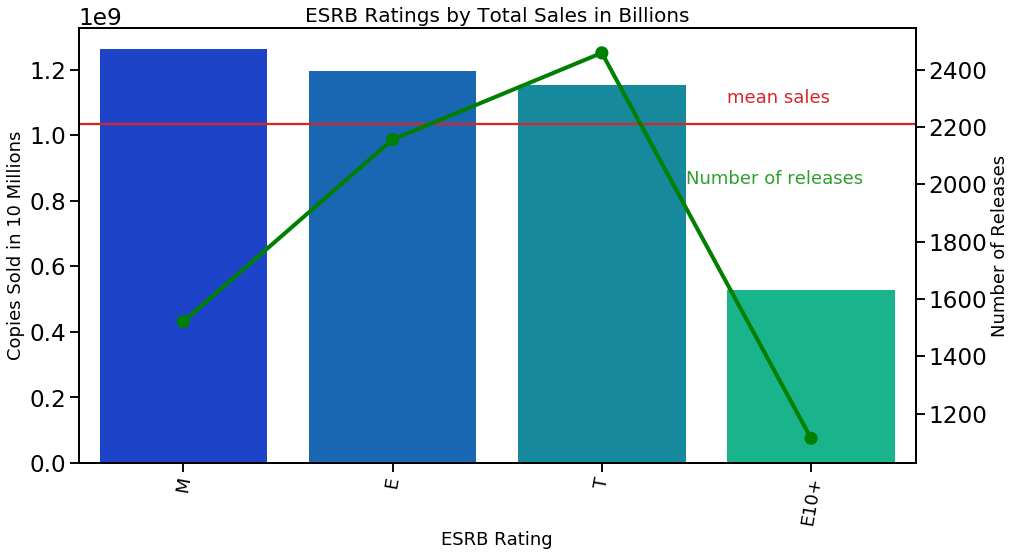

In [35]:
data = pd.DataFrame(final_data.sort_values(by='Global Sales',ascending=False))

plt.figure(figsize=(15,8))
colors = sns.color_palette("winter", len(data))
ax = sns.barplot(y = 'Global Sales' , x = data.index, data=data, palette=colors)
ax.set_ylabel(ylabel='Copies Sold in 10 Millions', fontsize=18)
ax.set_xlabel(xlabel='ESRB Rating', fontsize=18)
ax.set_title(label='ESRB Ratings by Total Sales in Billions', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=18,rotation=80)

mean=final_data['Global Sales'].mean()
ax.axhline(mean,color='tab:red')
ax.text(2.6, 1100000000, 'mean sales', color='tab:red',fontsize=18)

#allow multiple axis on same plot
ax2 = ax.twinx()
ax2 = sns.pointplot(y = 'Releases' , x =data.index, data=final_data,color='green')
ax2.set_ylabel(ylabel='Number of Releases', fontsize=18)
ax2.text(2.4, 2000, 'Number of releases', color='tab:green',fontsize=18)

plt.show();

This graph shows the number of copies sold for ESRB rating as blue bars with the axis on the left. The blue line shows the number of releases for each ESRB rating on the right axis. The red bar shows the mean number of copies sold. Its clear to see that Mature Has the most copies sold while E10+ as the smallest number sold. Mature has quite a low number of releases considering how high its number of copies sold is.

In [36]:
final_data

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
ESRB,,,,,,,
M,1.263510e+09,1521,107985,10810.0,830710.059172,71.0,7.1
E,1.197500e+09,2156,148910,14913.2,555426.716141,69.1,6.9
T,1.152270e+09,2458,168886,17506.3,468783.563873,68.7,7.1
E10+,5.287800e+08,1114,75426,7503.1,474667.863555,67.7,6.7


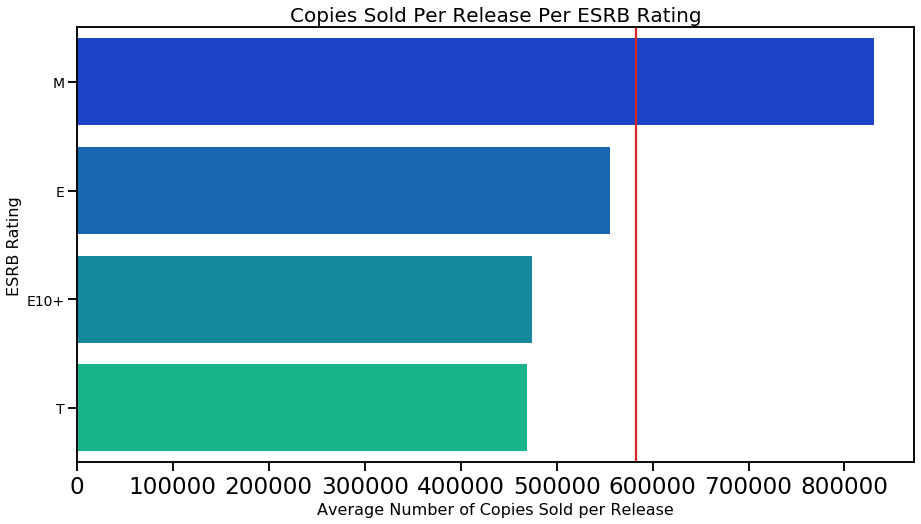

In [50]:
data = final_data.sort_values(by='Sales Per Release',ascending=False)
esrb = data.index

colors = sns.color_palette("winter", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = esrb , x = 'Sales Per Release', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Number of Copies Sold per Release', fontsize=16)
ax.set_ylabel(ylabel='ESRB Rating', fontsize=16)
ax.set_title(label='Copies Sold Per Release Per ESRB Rating', fontsize=20)
ax.set_yticklabels(labels = esrb, fontsize=14)
#ax.set_xticklabels(labels= data['Sales Per Release'], fontsize=14)

mean=data['Sales Per Release'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

This graph shows the average number of copies sold per releases. As expected from the last graph mature has the highest number of copies sold per release. 

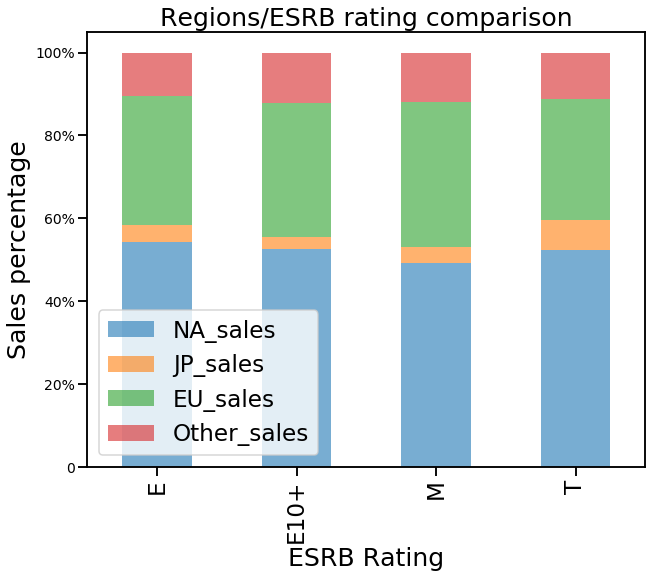

In [56]:
data=df[['name','na_sales','eu_sales','jp_sales','other_sales','meta_esrb']]
data=data.groupby(data['meta_esrb']).sum()
data['NA_sales']= data['na_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['JP_sales']=data['jp_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['EU_sales']=data['eu_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['Other_sales']=data['other_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data=data.drop(['na_sales','jp_sales','eu_sales','other_sales'],axis=1)
data=data.plot.bar(stacked=True, alpha=0.6,title='Regions/ESRB rating comparison',figsize=(10,8))
data.set_yticklabels(labels=['0','20%','40%','60%','80%','100%'],size=14)
var=data.set(xlabel='ESRB Rating',ylabel= 'Sales percentage'  )

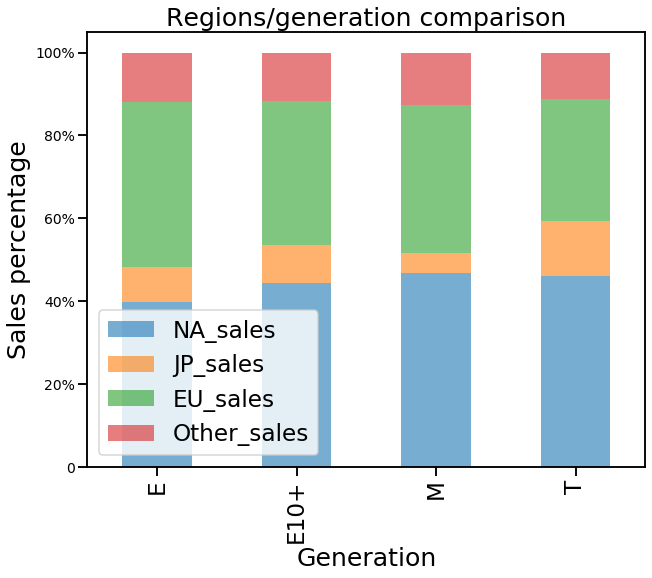

In [39]:
data=df[['name','na_sales','eu_sales','jp_sales','other_sales','meta_esrb']]
data=data.replace(0,np.nan)
data=data.dropna()
data=data.groupby(data['meta_esrb']).sum()
data['NA_sales']= data['na_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['JP_sales']=data['jp_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['EU_sales']=data['eu_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data['Other_sales']=data['other_sales']/(data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales'])
data=data.drop(['na_sales','jp_sales','eu_sales','other_sales'],axis=1)
data=data.plot.bar(stacked=True, alpha=0.6,title='Regions/generation comparison',figsize=(10,8))
data.set_yticklabels(labels=['0','20%','40%','60%','80%','100%'],size=14)
var=data.set(xlabel='Generation',ylabel= 'Sales percentage'  )

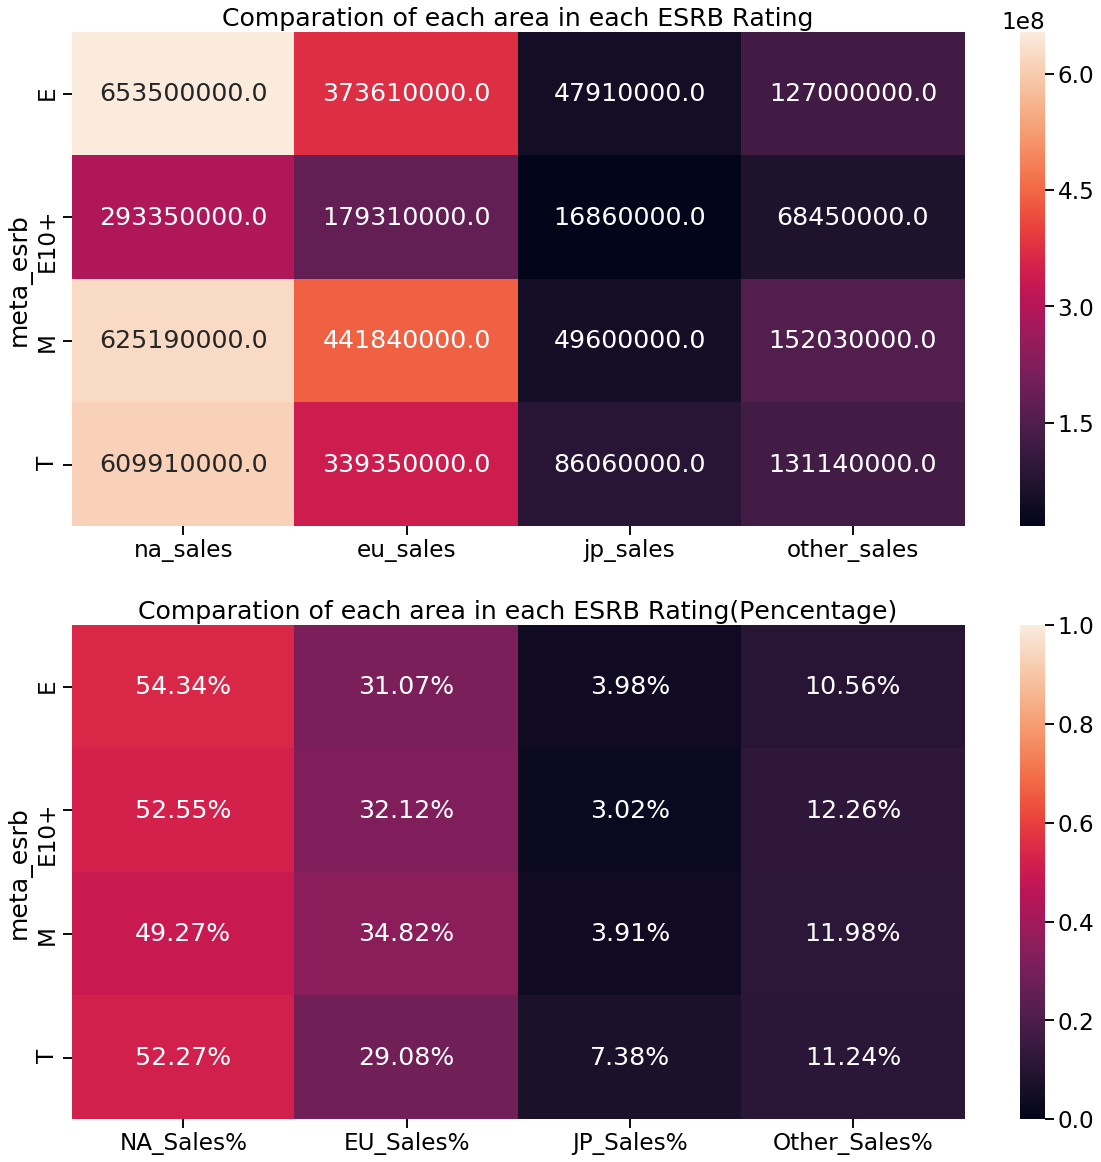

In [40]:
ESRBGroup = df.groupby(['meta_esrb']).sum().loc[:, 'na_sales':'global_sales']
ESRBGroup['NA_Sales%'] = ESRBGroup['na_sales']/ESRBGroup['global_sales']
ESRBGroup['EU_Sales%'] = ESRBGroup['eu_sales']/ESRBGroup['global_sales']
ESRBGroup['JP_Sales%'] = ESRBGroup['jp_sales']/ESRBGroup['global_sales']
ESRBGroup['Other_Sales%'] = ESRBGroup['other_sales']/ESRBGroup['global_sales']
plt.figure(figsize=(20, 20))
plt.subplot(211)
sns.heatmap(ESRBGroup.loc[:, 'na_sales':'other_sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each ESRB Rating")
plt.subplot(212)
sns.heatmap(ESRBGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each ESRB Rating(Pencentage)")
plt.show()

In [41]:
ESRBGroup

,na_sales,eu_sales,jp_sales,other_sales,global_sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
meta_esrb,,,,,,,,,
E,653500000,373610000,47910000,127000000,1.202620e+09,0.543397,0.310663,0.039838,0.105603
E10+,293350000,179310000,16860000,68450000,5.581900e+08,0.525538,0.321235,0.030205,0.122628
M,625190000,441840000,49600000,152030000,1.268980e+09,0.492671,0.348185,0.039087,0.119805
T,609910000,339350000,86060000,131140000,1.166790e+09,0.522725,0.290841,0.073758,0.112394


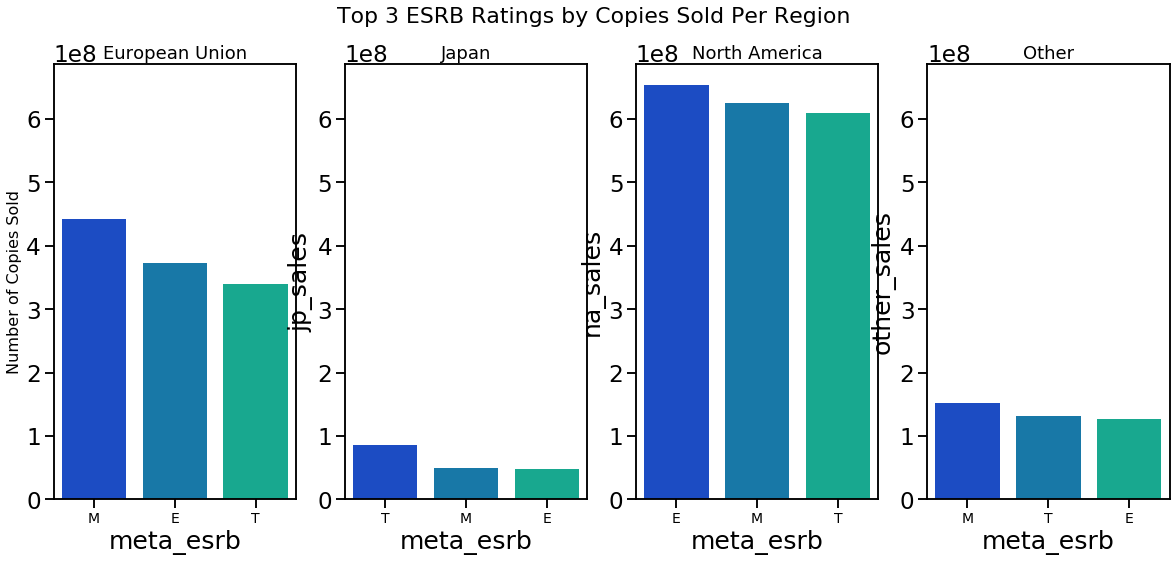

In [52]:
EU = df.pivot_table('eu_sales', columns='meta_esrb', aggfunc='sum').T
EU = EU.sort_values(by='eu_sales', ascending=False).iloc[:3]
EU_genres = EU.index

JP = df.pivot_table('jp_sales', columns='meta_esrb', aggfunc='sum').T
JP = JP.sort_values(by='jp_sales', ascending=False).iloc[:3]
JP_genres = JP.index

NA = df.pivot_table("na_sales", columns='meta_esrb', aggfunc='sum').T
NA = NA.sort_values(by="na_sales", ascending=False).iloc[:3]
NA_genres = NA.index

Other = df.pivot_table('other_sales', columns='meta_esrb', aggfunc='sum').T
Other = Other.sort_values(by='other_sales', ascending=False).iloc[:3]
Other_genres = Other.index

#colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue","Fighting":'Orange'}
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,4,1)
colors = sns.color_palette("winter", len(EU))
ax1.set_xticklabels(labels = EU_genres, size=14)
sns.barplot(x=EU_genres, y=EU["eu_sales"],palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Number of Copies Sold', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, size=14)

sns.barplot(x=JP_genres, y=JP['jp_sales'],palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, size=14)

sns.barplot(x=NA_genres, y=NA['na_sales'],palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres,  size=14)

sns.barplot(x=Other_genres, y=Other['other_sales'],palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 ESRB Ratings by Copies Sold Per Region', size=22)
plt.show();

This graph shows us that action is the best selling ESRB ratings in all of the regions.

# <font color='red'> **ESRB V Rating** </font> 

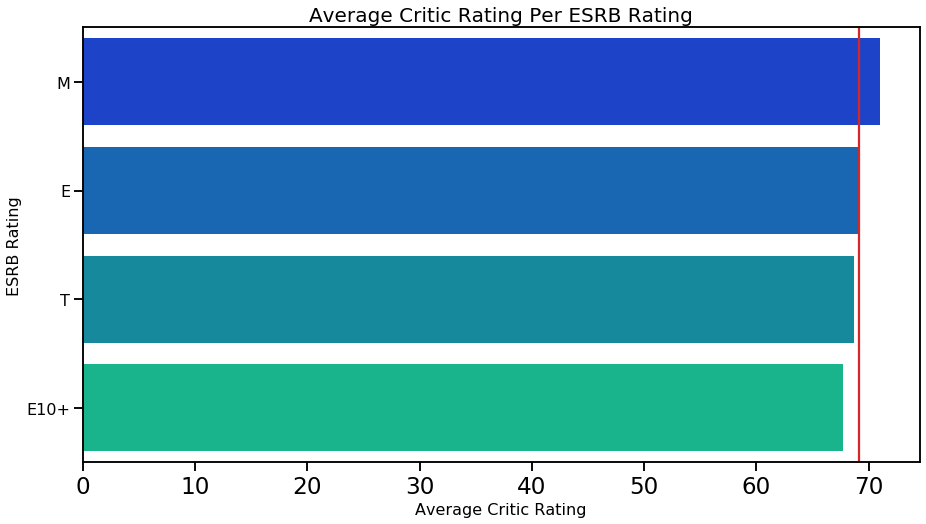

In [43]:
data = final_data.sort_values(by='Average Critic Rating',ascending=False)
genres = data.index

colors = sns.color_palette("winter", len(data))
plt.figure(figsize=(15,8))
ax = sns.barplot(y = genres , x = 'Average Critic Rating', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Critic Rating', fontsize=16)
ax.set_ylabel(ylabel='ESRB Rating', fontsize=16)
ax.set_title(label='Average Critic Rating Per ESRB Rating', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=16)

mean=data['Average Critic Rating'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();

This graph shows the average critic rating for games in each ESRB rating category. M (Mature) is top with an average rating of about 73.

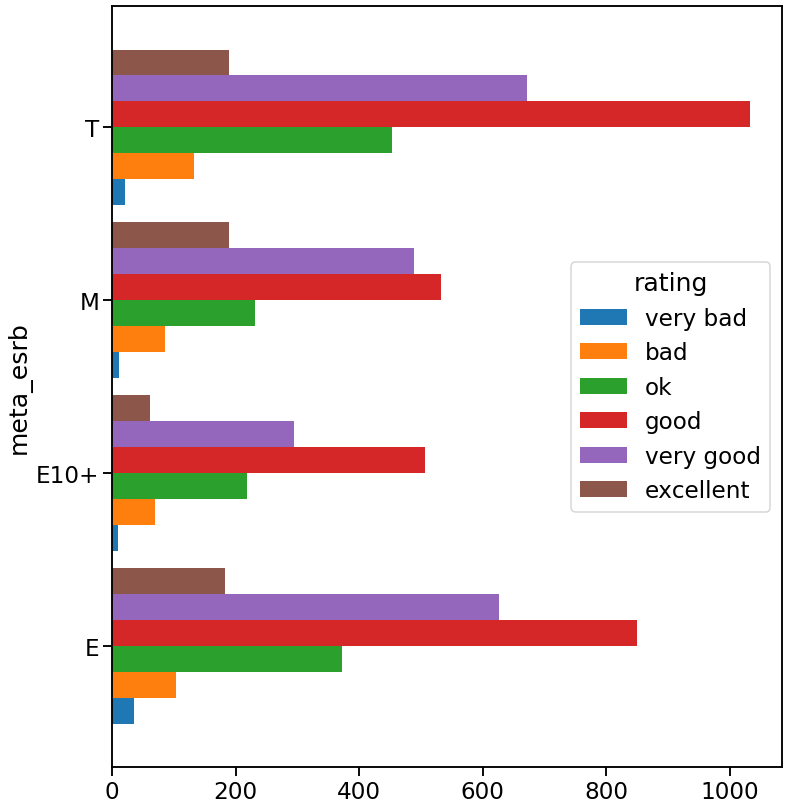

In [53]:
clone=df.copy()
clone['rating'] = pd.cut(clone['meta_critic_score'],
                      bins=[1]+list(replace_dict.values()),
                      labels=list(replace_dict.keys()))

colors= sns.diverging_palette(220, 20, n=7)
clone=clone[['rating','meta_esrb','meta_critic_score']]
plat=clone.groupby(['meta_esrb','rating'])['meta_critic_score'].count().reset_index()
plat=plat.pivot('meta_esrb','rating','meta_critic_score')
plat.plot.barh(width=0.9)
fig=plt.gcf()
fig.set_size_inches(12,14)
plt.show()

This graph shows the number of very bad (>= 30),bad (31-45), ok (46-60), good (61-75), very good (75-85), and excellent (86-100) games each genre has.Its clear to see that most games are in the good category. 

Text(0, 0.5, 'Critic Score')

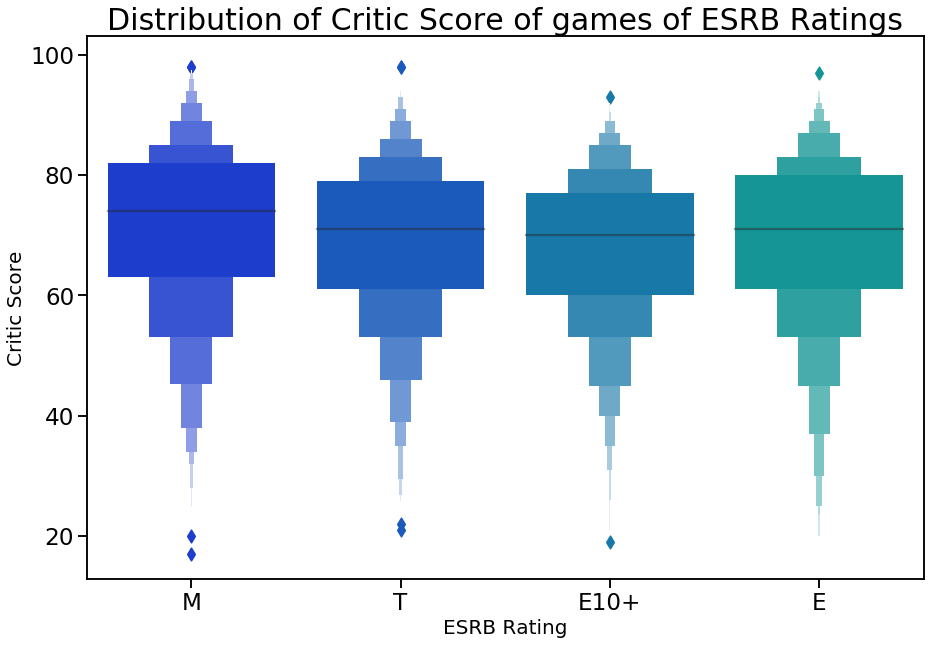

In [46]:
data=df
plt.figure(figsize=(15,10))
colors = sns.color_palette("winter",5)
sns.boxenplot(x='meta_esrb',y='meta_critic_score',data=data,palette=colors)
plt.title('Distribution of Critic Score of games of ESRB Ratings',fontdict={'fontsize':30})
plt.xlabel('ESRB Rating',fontdict={'fontsize':20})
plt.ylabel('Critic Score',fontdict={'fontsize':20})